---
---

# **1 - Logistic Regression**

Logistic Regression is a classification algorithm designed to predict categorical target labels.



The categorical target column is two or more discrete class labels, for example:
 * Class 0: Car Image
 * Class 1: Street Image
 * Class 2: Bridge Image

Keep in mind, any continous target can be converted into categories through discretization, for example:
  
 * Class 0: House Price $\$$0-100k
 * Class 1: House Price $\$$100-200k
 * Class 2: House Price >$\$$200k 

Classification also often produce a probability prediction of belonging to a class, for example:
 * Class 0: 10% Probability
 * Class 1: 85% Probability
 * Class 2: 5% Probability



---
**Logistic Function**

Logistic Regression works by transforming a Linear Regression into a classification model through the use of the logistic function:

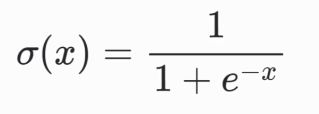

Plot of Logistic Function:

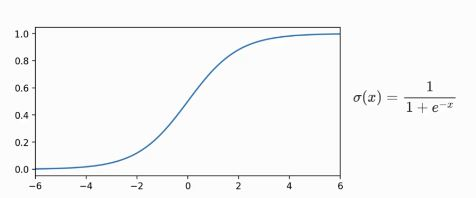

Also notice any value of x will have an output range between 0 and 1. Because many natural real world systems have 'Carrying capacity' or a natural limiting factor.


---
**Linear Regression vs Logistic Regression**

Linear Regression easily distorted by only having 0 and 1 as possible y training values. Also would be unclear how to interpret predicted y values between 0 and 1. We could make use of the Logistic Function for a conversion:

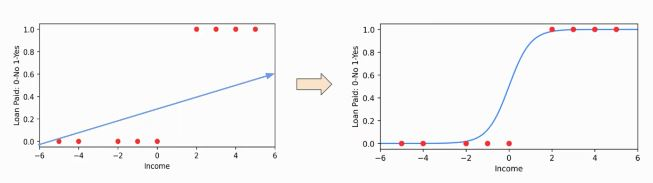

---
**How Logistic Regression Works**


Treat the y-axis as a probability of belonging to a class.

Treating P(y=1)>= 0.5 as a cut-off for classification

For example, a new person with an income of 1, based on image, the function predict a 90% probability of paying off loan, then the prediction of Loan Paid = 1:

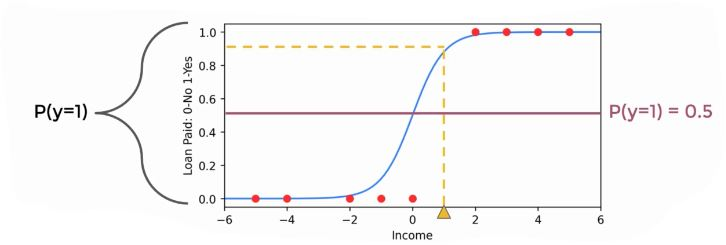


---
**Odds**

The odds of an event with probability p is defined as chance of the event happening divided by the chance of the event not happening

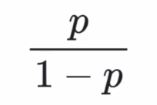

---
**Mathematics Analysis of Logistic Regression**

We already know the Linear Regression equation:

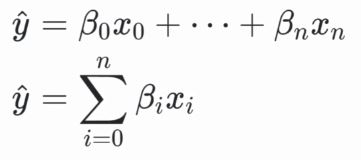

All we need to do is plug the Linear Regression equation into the Logistic function to create a Logistic Regression:

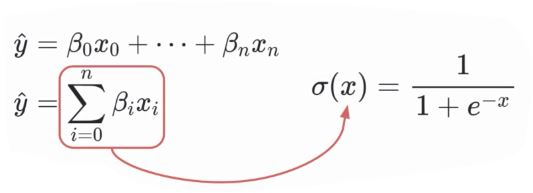



Simply put in terms of the logistic function:

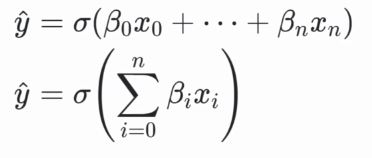

So we can get:

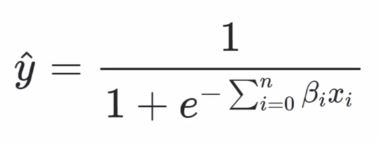

Solving for **log odds**:

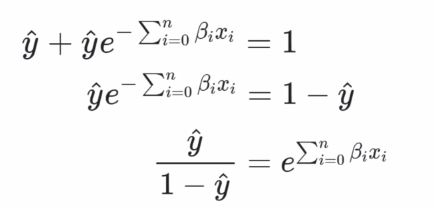

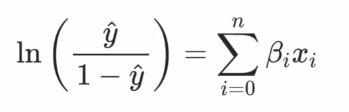

Since the log odds scale is nonlinear, a B value can not be directly linked to 'one unit increase'.

---
**Function curve of log odds**

What would the function curve look like in terms of log odds?

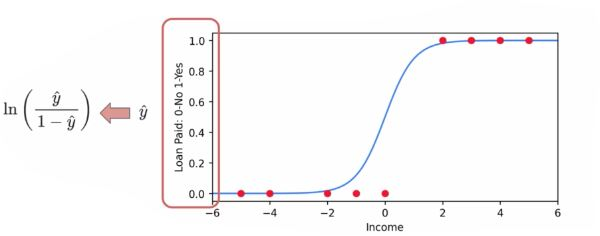

Consider probability (p) = 0.5, halfway point now at 0. As p goes to 1 then log odds becomes infinity. As p goes to 0 then log odds becomes negatif infinity.

Class point now at infinity. On log scale logistic function is straight line.

Log Odds or ln(Odds) Plot:

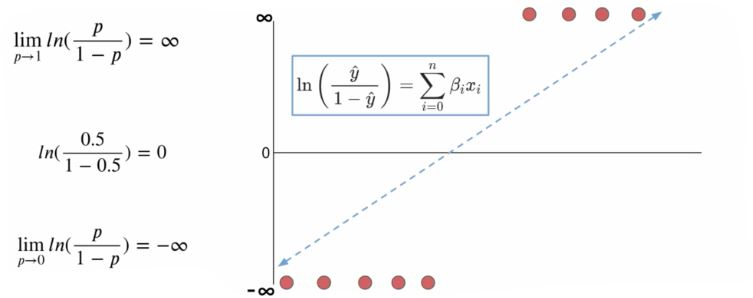

Coefficient interpretation:
* Harder to directly interpret magnitude of B directly, especially when we could have discrete and continous x feature values.
* We can however begin to use odds ratio, essentially comparing magnitude againts each other
* Comparing magnitudes of coefficients (B) can lead to insight over which features have the strongest effect on prediction output


Also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/


---
**Best Fit with Maximum Likelihood**

The first step for maximum likelihood is to go from log odds back to probability

**Note: ln(odds) is the value of ln(p/(1-p))**

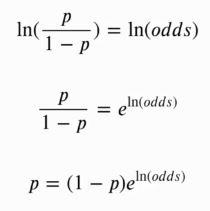

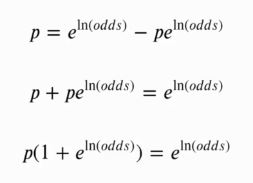

So we can get probability:

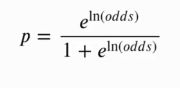


Let's now explore the intuition behind maximum likelihood:

1. We choose a line in the log(odds) axis and project the points on to the line
2. Calculate the log odds for the projected points on this line
3. Plot these values as probabilitites on the logistic regression model

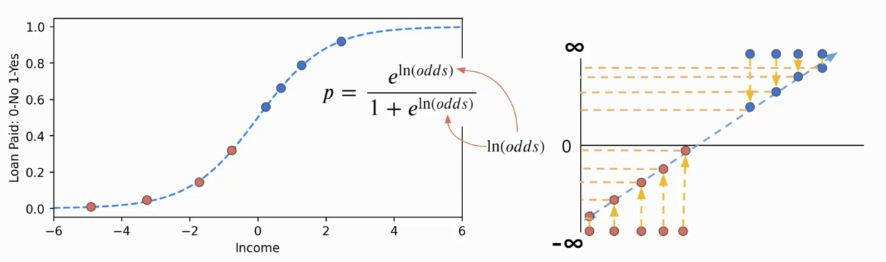

We now measure the likelihood of these probabilities

**Note: Likelihood is a product of probabilities of belonging to class 1**

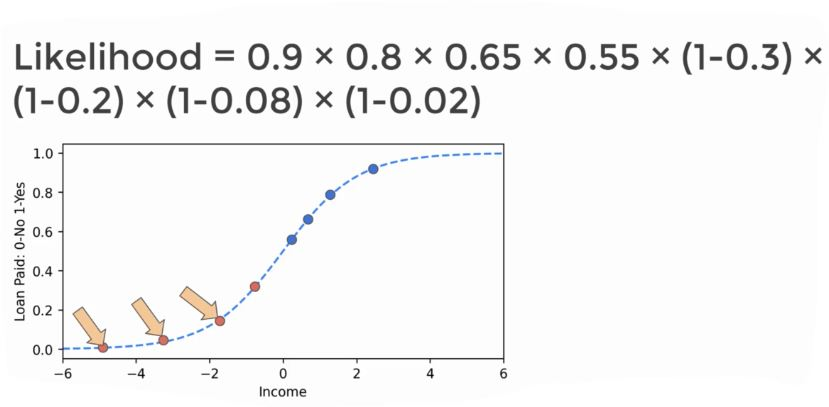

Likelihood below p=0.5 will be 1-p

Total Likelihood:

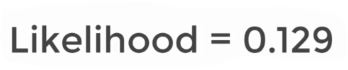

In practice we actually maximize the log of the likelihoods (e.g. ln(0.9) * ln(0.8) * ...)

---
**Log Loss**

While we are trying to maximize the likelihood, we still need something to minimize, sice computer gradient descent methods can only search for minimums.

In terms of a cost function, we seek to minimize the following (log loss):

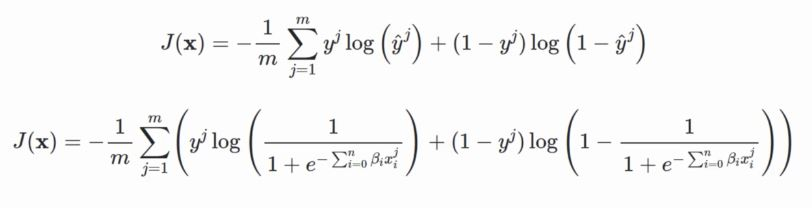

---

## **A. Data Set**

**Data**

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/8_Logistic_Regression/hearing_test.csv')

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


---

## **B. Exploratory Data Analysis and Visualization**

Feel free to explore the data further on your own.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


No Missing Value

In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


---

### **a. Label Count**

In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

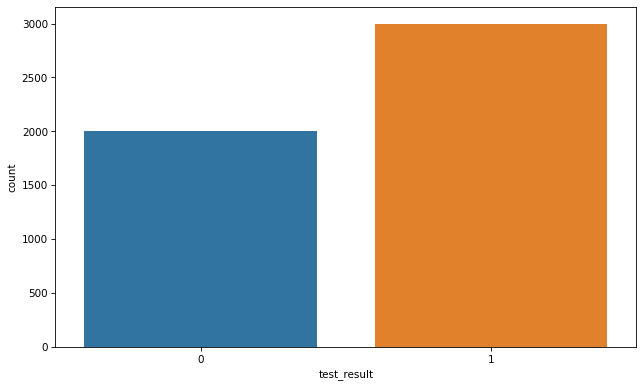

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(data=df,x='test_result')
plt.show()

---

### **b. Features Distribution**

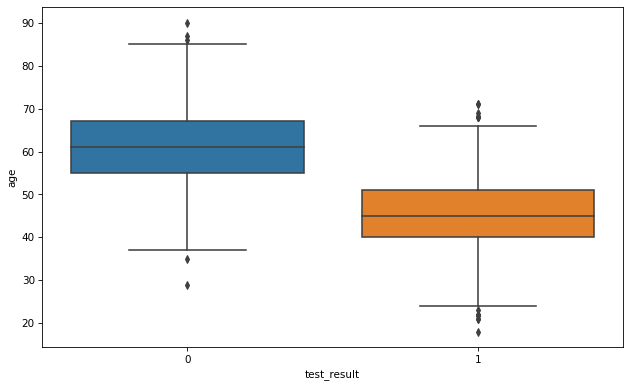

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.boxplot(x='test_result', y='age',data=df)
plt.show()

People who dont pass the test tends to be older than people who do pass the test.

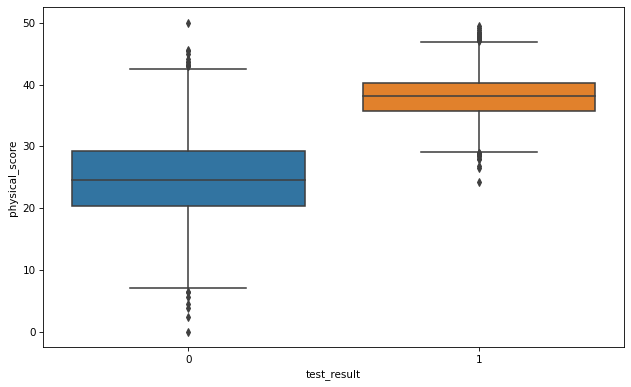

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.boxplot(x='test_result', y='physical_score', data=df)
plt.show()

Peoplo who pass the test tends to be more healthy than peoplo who dont pass the test.

---

### **c. Features Relationship**

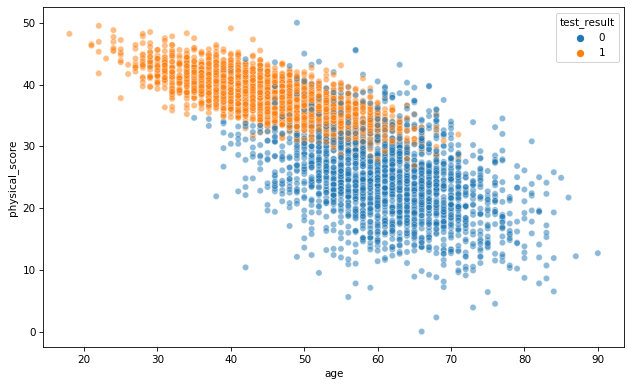

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)
plt.show()

The younger people tends to has high physical_score than the older people.

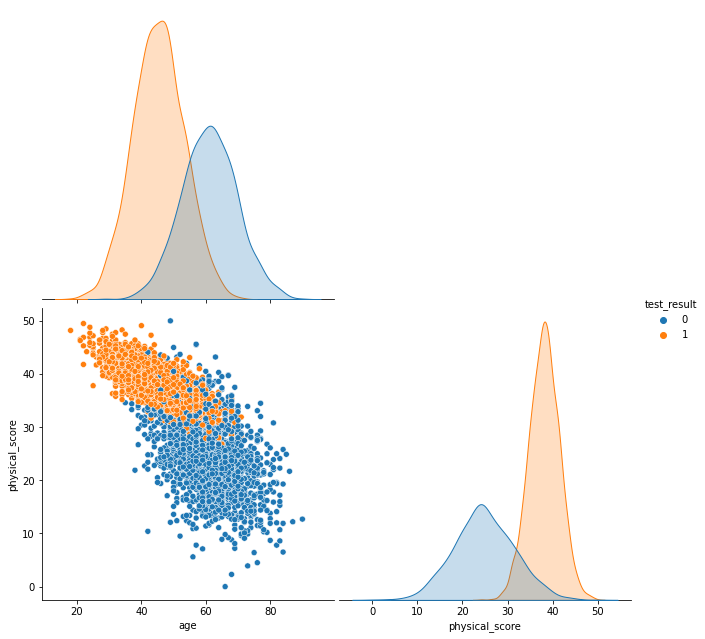

In [ ]:
#plt.figure(dpi=75)
sns.pairplot(df, hue='test_result', corner=True, height=4.5)
plt.show()

The person who passed the test, distributed around age of 45 and physical_score around 38.
The person who failed the test, distributed around age of 62 and physical_score around 25

---

### **d. Features Impact on Test Result**

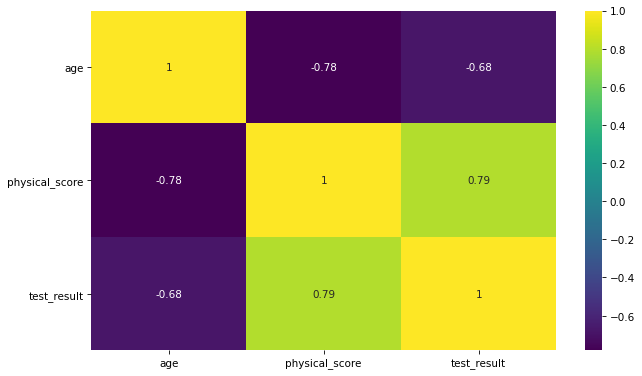

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.corr()['test_result'].sort_values()

age              -0.683171
physical_score    0.792716
test_result       1.000000
Name: test_result, dtype: float64

Based on image above, the older the age, more likely to fail the test. And the higher the physical_score, more likely to pass the test.

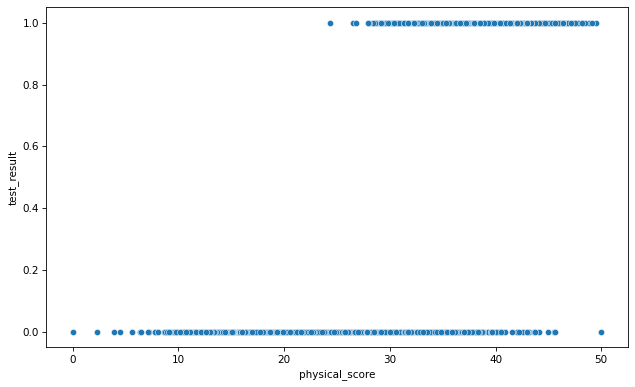

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='physical_score', y='test_result',data=df)
plt.show()

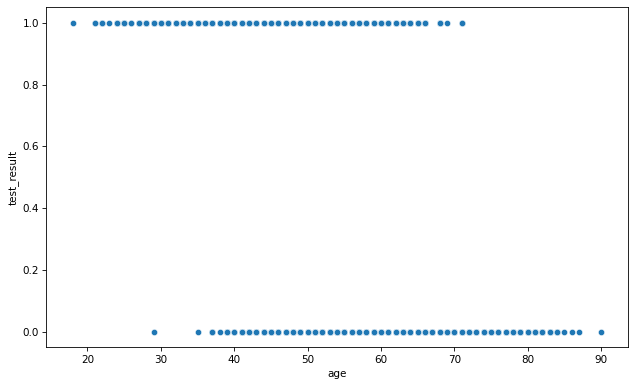

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='age',y='test_result',data=df)
plt.show()

*3D plot of scatterplot above*

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

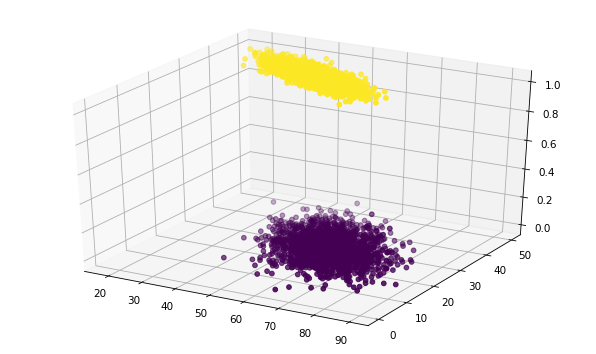

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6), dpi=75)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df['age'], ys=df['physical_score'], zs=df['test_result'], c=df['test_result'])
plt.show()

---

## **C. Logistic Regression Model**

#### **a. Setup**

##### **Train | Test Split**

In [ ]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# We will use Cross Validation, so we only small amount of test data as hold-out data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
X_train.shape

(4500, 2)

In [ ]:
X_test.shape

(500, 2)

---

##### **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit (Calculate statistical information) and Transform training data
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
# Transform test data (hold-out data to test model)
scaled_X_test = scaler.transform(X_test)

---

### **b. Create Estimator/Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Without CV
# help(LogisticRegression)

In [ ]:
# With CV
# help(LogisticRegressionCV)

In [ ]:
log_model = LogisticRegression()

---

#### **Fit/Train Model**

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

---

#### **Coefficients**

**Report back the model's coefficients.**

In [ ]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

---

### **c. Model Performance on Classification Tasks Theory**

**Confusion Matrix**

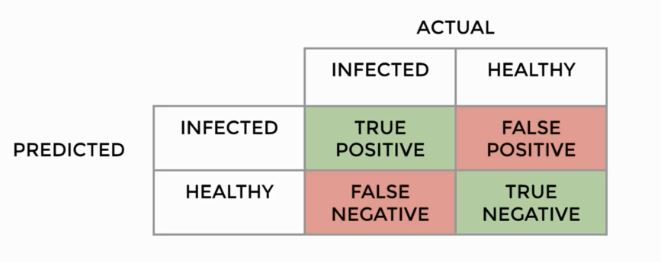

**TP / True Positive: when an actual observation was positive and the model prediction is also positive**

**FN / False Negative: when an actual observation was positive but the model prediction is negative**

**TN / True Negative: when an actual observation was negative and the model prediction is also negative**

**FP / False Positive: when an actual observation was negative but the model prediction is positive**


---
**Accuracy**

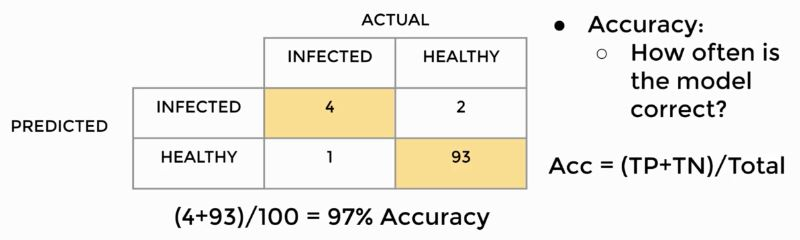

Imagine we always report back (predicted) healthy:

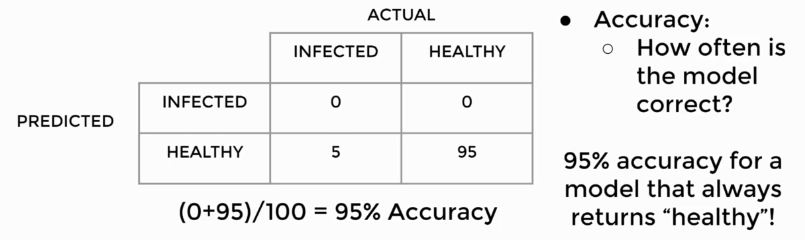

This is the accuracy paradox:
* Any classifier dealing with **imbalanced** classes has to confront the issue of the accuracy paradox
* **Imbalanced** classes will always result in a distorted accuracy reflecting better performance than what is truly warranted

This means we shouldn't solely rely on accuracy as a metric

---
**Recall, Precision, and F1-Score**





**Recall (Sensitivity)** : Determines the fraction of **positive case** that were **correctly identified** (How many relevant case are found?)


    Recall = (TP) / (TP + FN) 


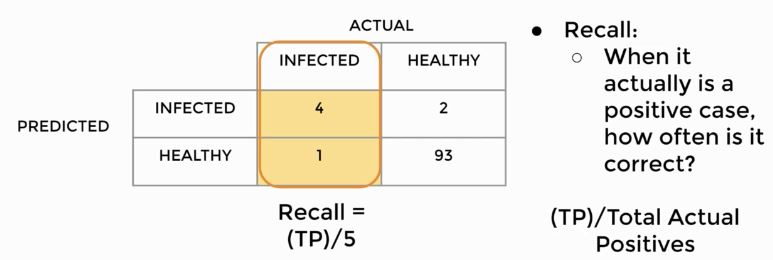

**Precision** : Determines the accuracy of relevant case predictions (When prediction is positive, how often is it correct).

    Precision = (TP) / (TP+FP) 

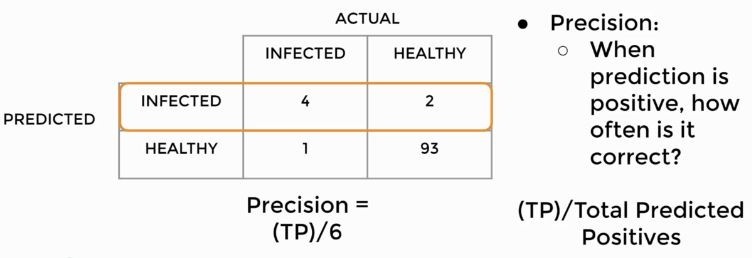


Since precision and recall are related to each other through the numerator (TP), we often also report the F1-Score, which is the harmonic mean of precision and recall

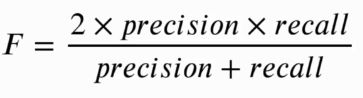


The harmonic mean (instead of the normal mean) allows the entire harmonic mean to go to zero if **either** precision or recall ends up being zero.
As a final note, there are many more metrics available.

---
**Receiver Operator Characteristic (ROC)**

How many TP vs FP ?

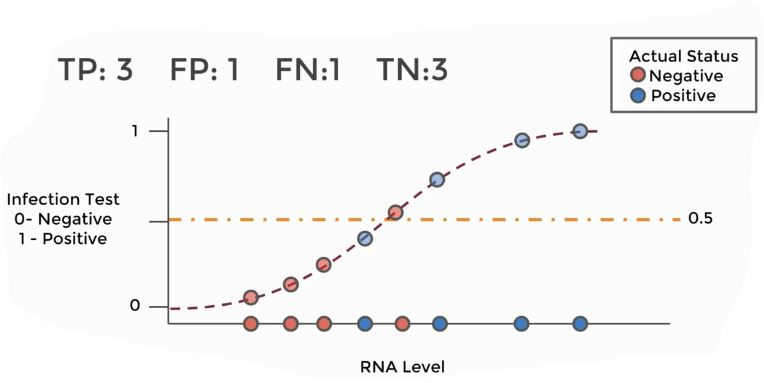

What if we lowered the cut-off ?

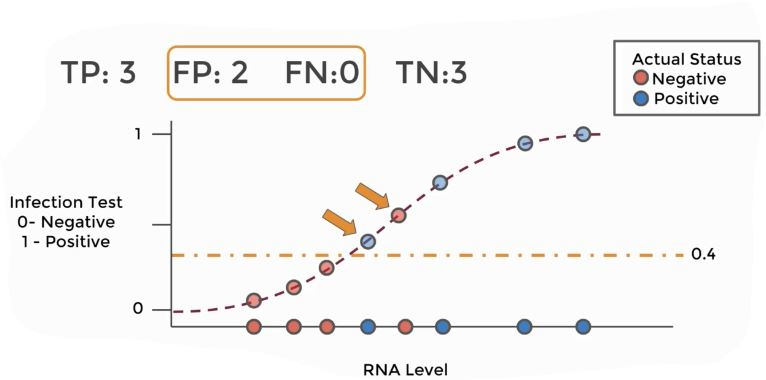

In certain situations, we gladly accept **more false positives** to **reduce false negatives**.

Imagine a dangerous virus test, we would much rather produce false positives and later do more stringent examination than accidentally release a false negative

By changing the cut-off limit, we can adjust True vs False Positive (ROC) curve

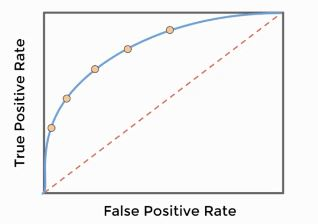



A perfect model would have zero False Positive Rates (FPR), random guessing line.

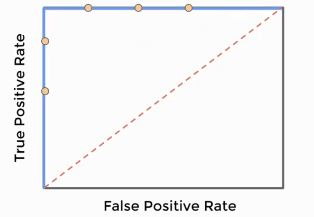

Realistically with smaller data sets the ROC curves are not as smooth. AUC - Area Under the Curve, allows us to compare ROCs for different mdoels.

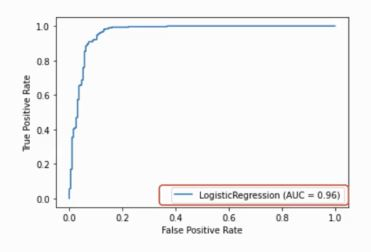


Can also create precision vs recall curves:

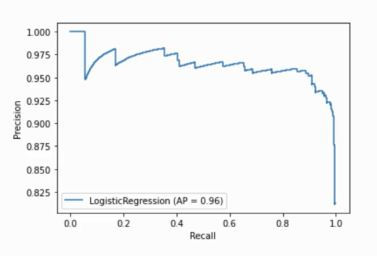

---

#### **Classification Metrics on Test Set**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
# Predict on hold-out data (unseen data)
y_pred = log_model.predict(scaled_X_test)

In [ ]:
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [ ]:
log_model.classes_ # Check Class of predicted label

array([0, 1])

In [ ]:
# y prediction
y_pred[0:5]

array([1, 1, 0, 1, 0])

In [ ]:
# y prediction probability
y_pred_proba[0:5] # Probability of class 0 and class 1

array([[0.02384343, 0.97615657],
       [0.02692408, 0.97307592],
       [0.98919417, 0.01080583],
       [0.00190769, 0.99809231],
       [0.97501262, 0.02498738]])

In [ ]:
# Actual y value
np.array(y_test[0:5])

array([1, 1, 0, 1, 0])

In [ ]:
# Beware of accuracy paradax in imbalanced class
accuracy_score(y_test, y_pred)

0.93

In [ ]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [ ]:
pd.DataFrame({0:['TP', 'FP'],
              1:['FN','TN']})

,0,1
0,TP,FN
1,FP,TN


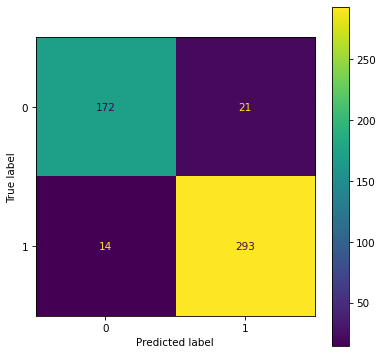

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=75) # To resize the plot image using ax
plot_confusion_matrix(estimator=log_model, X=scaled_X_test, y_true=y_test, ax=ax, values_format='')
plt.show()

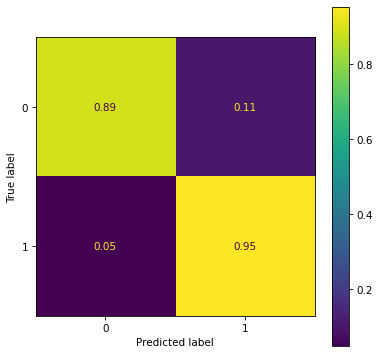

In [ ]:
# Scaled so highest value=1
fig, ax = plt.subplots(figsize=(6,6), dpi=75) # To resize the plot image using ax
plot_confusion_matrix(estimator=log_model, X=scaled_X_test, y_true=y_test, normalize='true', ax=ax, values_format='0.2f')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



macro avg: standard mean

weighted avg: weight that based off the number of instances per class

In [ ]:
#X_train.iloc[0]

In [ ]:
#y_train.iloc[0]

In [ ]:
# 0% probability of 0 class
# 100% probability of 1 class
#log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

In [ ]:
#log_model.predict(X_train.iloc[0].values.reshape(1, -1))

---

#### **Evaluating Curves and AUC**


In [ ]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

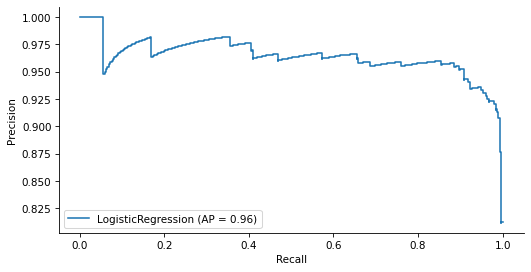

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_precision_recall_curve(log_model, scaled_X_test, y_test, ax=ax)
sns.despine() # Remove border from graph
plt.show()

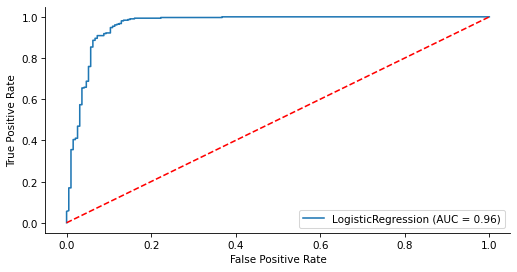

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_roc_curve(log_model, scaled_X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--')
sns.despine()
plt.show()

AUC = Area under the curve

------
------

# **2 - Multi-Class Logistic Regression**

How to perform non binary classification with Logistic Regression?. Fortunately, the process with scikit-learn is pretty much the same as with binary classification. To expand our understanding, we'll go through a simple data set, as well as seeing how to use LogisiticRegression with a manual GridSearchCV (instead of LogisticRegressionCV). 

## **A. Data Set**

**Data**

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/8_Logistic_Regression/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **B. Exploratory Data Analysis and Visualization**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No missing value

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---

### **a. Label Count**

In [ ]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

balanced class

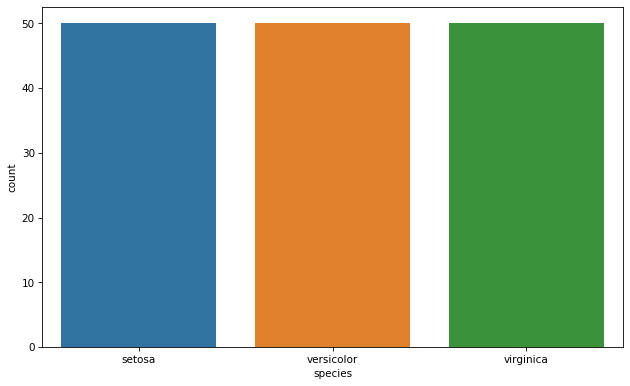

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(data =df, x='species')
plt.show()

---

### **b. Features Correlation**

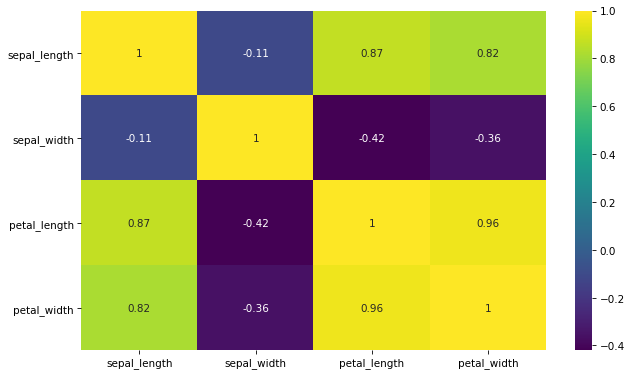

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.corr()['petal_width'].sort_values()

sepal_width    -0.356544
sepal_length    0.817954
petal_length    0.962757
petal_width     1.000000
Name: petal_width, dtype: float64

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

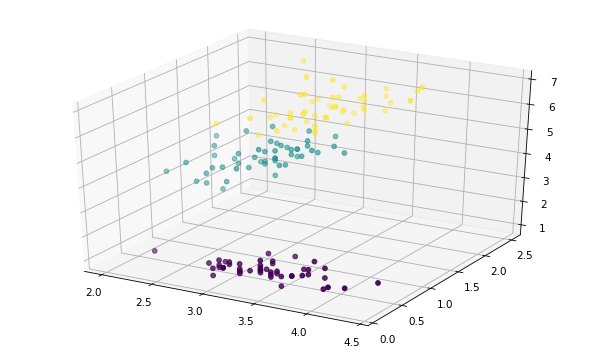

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6), dpi=75)
ax = fig.add_subplot(111, projection='3d')

# .mapping the value based on dictionary
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'], df['petal_width'], df['petal_length'], c=colors);

---

### **c. Features Relationship**

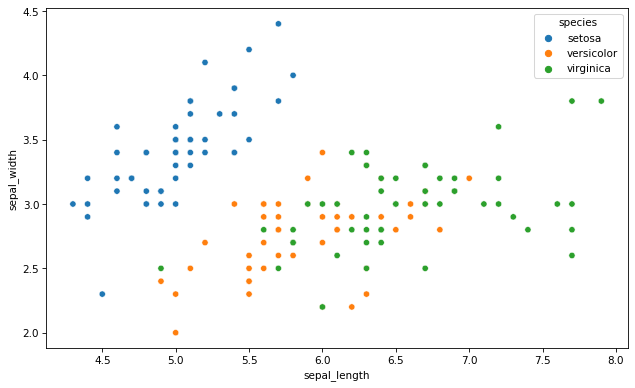

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.show()

sepal length vs sepal width is harder to recognize

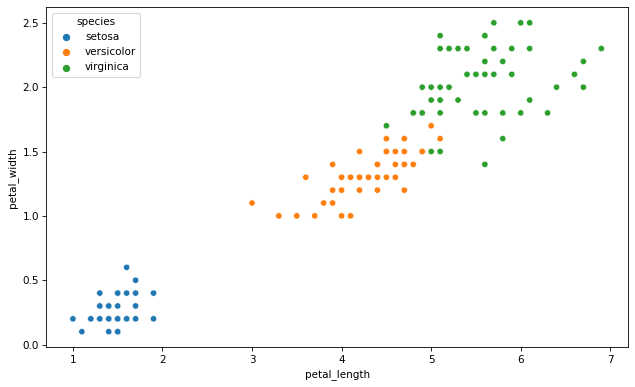

In [ ]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.show()

petal length vs petal width is easier to recognize

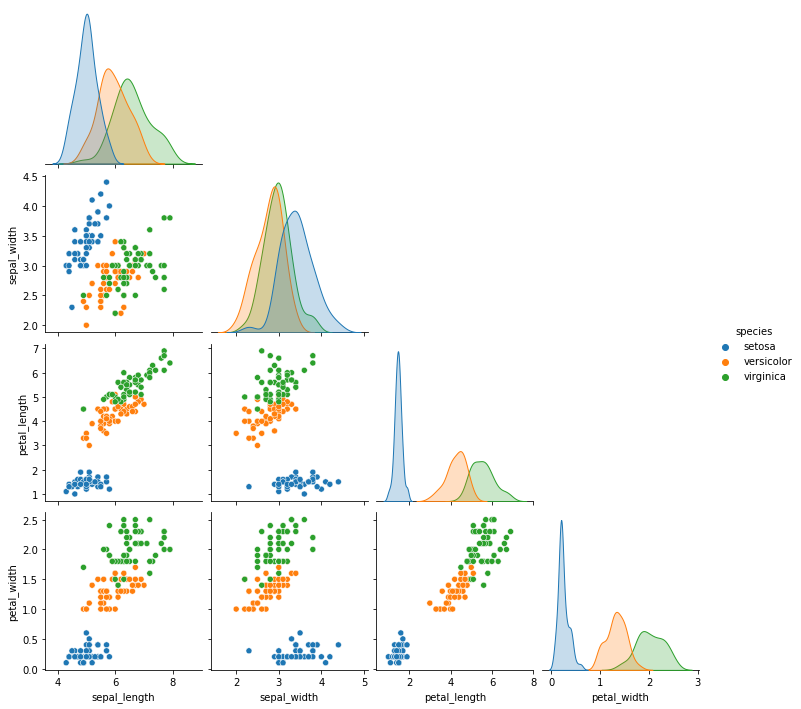

In [ ]:
sns.pairplot(df, hue='species', corner=True)
plt.show()

sepal width distribution of all species are overlapping each other makes it harder to recognize

---

## **C. Multi-Class Logistic Regression Model**

### **a. Setup**

#### **Train | Test Split**

In [ ]:
X = df.drop('species',axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

---

#### **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit (Calculate statistical information) and Transform training data
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
# Transform test data (hold-out data to test model)
scaled_X_test = scaler.transform(X_test)

---

### **b. Create Estimator/Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
#  If the option chosen is 'ovr' (over-the-rest), then a binary problem is fit for each label. 
log_model = LogisticRegression(solver='saga', multi_class="ovr", max_iter=5000)

---

#### **GridSearch for Best Hyper-Parameters**

Main parameter choices are regularization penalty choice and regularization C value.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Penalty Type (Regularization)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20) # for elastic net

'''
np.logspace -> Return numbers spaced evenly on a log scale.
Use logarithmically spaced C values (recommended in official docs)
Smaller values specify stronger regularization
'''
C = np.logspace(0, 4, 10) # 10^0 to 10^4

param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [ ]:
'''
log 100 = log 10^2 = 2 log 10 = 2 
log scale is a^c = b <-> log b = c
a is base -> 10
'''
C

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

**Scoring Paramater:**

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
grid_log_model = GridSearchCV(log_model, 
                          param_grid=param_grid,
                          verbose=0)

---

#### **Fit/Train Model**

In [ ]:
grid_log_model.fit(scaled_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2...
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.7894

In [ ]:
grid_log_model.best_params_

{'C': 7.742636826811269, 'l1_ratio': 0.0, 'penalty': 'l1'}

---

#### **Coeffecients**

**Report back the model's coefficients.**

In [ ]:
# Coefficient for 3 different species (Multi Class)
grid_log_model.best_estimator_.coef_

array([[ 0.        ,  1.68013984, -4.46195673, -2.53108531],
       [-0.26678001, -1.19258383,  2.55069714, -2.26568025],
       [-0.705024  , -1.93054965,  6.49265727,  9.37281697]])

---

### c. Performance Evaluation

#### **Classification Metrics on Test Set**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = grid_log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

In [ ]:
pd.DataFrame({0:['TP', 'FP'],
              1:['FN','TN']})

,0,1
0,TP,FN
1,FP,TN


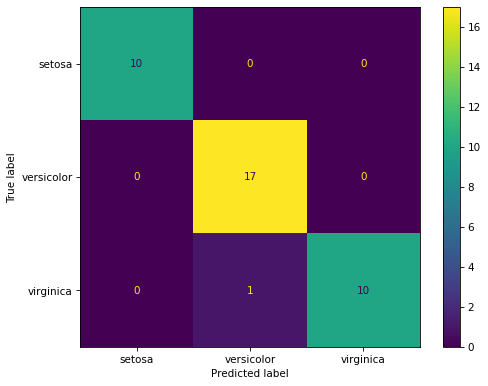

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_log_model,scaled_X_test,y_test, ax=ax)
plt.show()

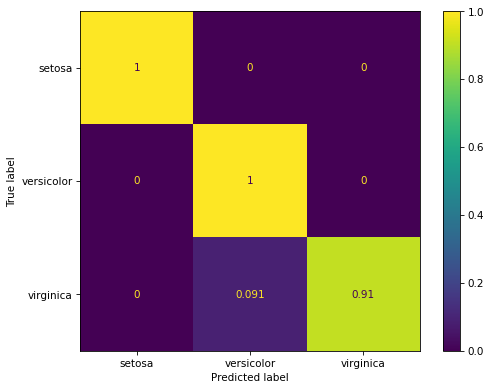

In [ ]:
# Scaled so highest value=1
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_log_model, scaled_X_test, y_test, normalize='true', ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



---

#### **Evaluating Curves and AUC**

**We need to manually create the plots for a Multi-Class situation. Fortunately, Scikit-learn's documentation already has plenty of examples on this.**

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

We have created a function for you that does this automatically, essentially creating and plotting an ROC per class.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # dictionary structures
    fpr = dict() #false positive ratio
    tpr = dict() #true positive ratio
    roc_auc = dict() # area under curve

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--') #plot dashed diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    
    # Plot the ROC curve
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2}) for label {i}')
        
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine() # remove border from graph
    plt.show()

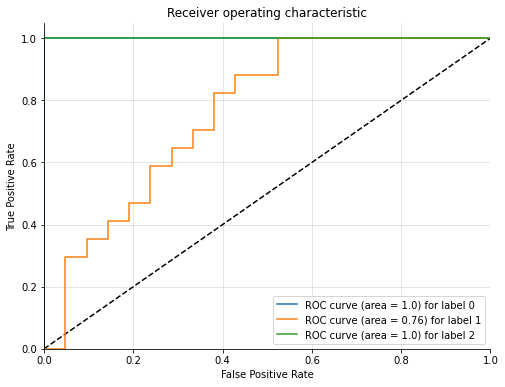

In [ ]:
plot_multiclass_roc(grid_log_model, scaled_X_test, y_test, n_classes=3, figsize=(8, 6))

------
------